# Load Dataset

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Deep Learning (ANN)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv('bank.csv', sep=';')

# Display the first few rows

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Preprocessing

In [7]:
# Split into features (X) and target (y)
X = data.drop(columns='y')
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [8]:
# Categorical columns to apply one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns

# Create column transformer for preprocessing
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_columns),
    ('scaler', StandardScaler(), X.select_dtypes(include=[np.number]).columns)
])

In [9]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
# Apply preprocessing on the training and test sets
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


# ---- Traditional Machine Learning Models ----

In [12]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8997789240972734
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1201
           1       0.64      0.30      0.41       156

    accuracy                           0.90      1357
   macro avg       0.78      0.64      0.68      1357
weighted avg       0.88      0.90      0.88      1357



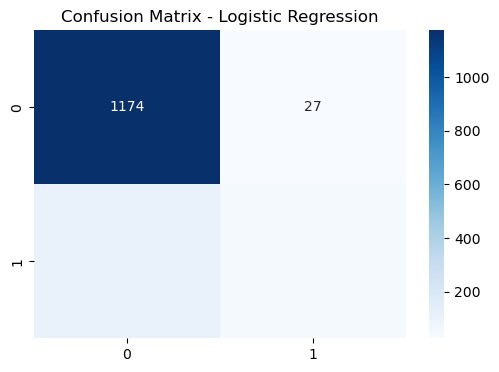

In [13]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [14]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8651436993367723
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1201
           1       0.41      0.38      0.39       156

    accuracy                           0.87      1357
   macro avg       0.66      0.65      0.66      1357
weighted avg       0.86      0.87      0.86      1357



In [15]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8938835666912307
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1201
           1       0.61      0.21      0.31       156

    accuracy                           0.89      1357
   macro avg       0.76      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357



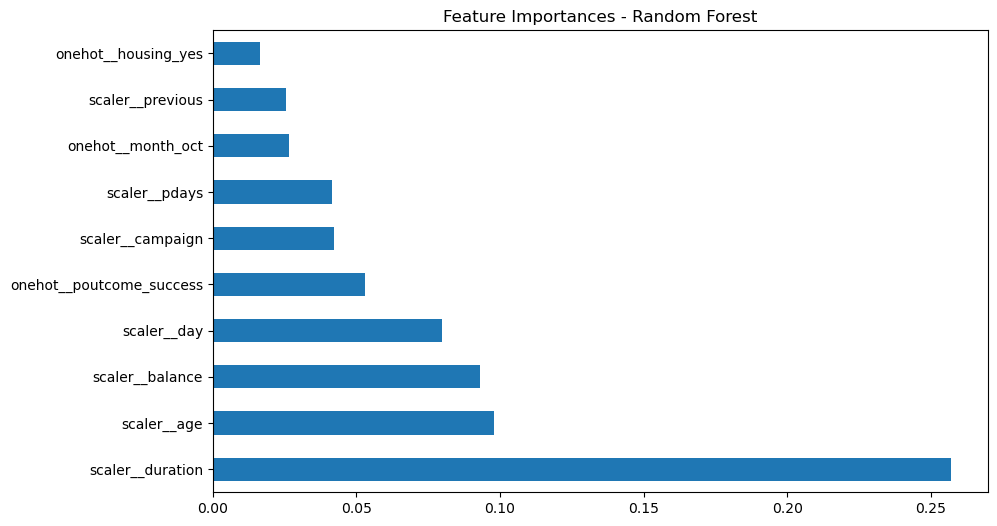

In [16]:
# Plot Feature Importance for Random Forest
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf.feature_importances_, index=preprocessor.get_feature_names_out())
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.show()

In [17]:
# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8865143699336773
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1201
           1       0.53      0.13      0.21       156

    accuracy                           0.89      1357
   macro avg       0.71      0.56      0.58      1357
weighted avg       0.85      0.89      0.86      1357



# ---- Deep Learning (ANN) ----

In [19]:
# Building the ANN model
ann = Sequential()

In [20]:
# layer 
ann.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

C:\Users\sataa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
# Train the model
history = ann.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8698 - loss: 0.4068 - val_accuracy: 0.8902 - val_loss: 0.2649
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.2595 - val_accuracy: 0.8931 - val_loss: 0.2484
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8963 - loss: 0.2341 - val_accuracy: 0.8983 - val_loss: 0.2442
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9073 - loss: 0.2179 - val_accuracy: 0.9020 - val_loss: 0.2397
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9189 - loss: 0.2016 - val_accuracy: 0.8976 - val_loss: 0.2350
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9136 - loss: 0.2095 - val_accuracy: 0.8983 - val_loss: 0.2349
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9230 - loss: 0.1946 - val_accuracy: 0.8954 - val_loss: 0.2361
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 0.1943 - val_accuracy: 0.8954 - val_loss:

In [23]:
# Evaluate the model
loss, accuracy = ann.evaluate(X_test, y_test)
print("ANN Accuracy:", accuracy)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8875 - loss: 0.3900 
ANN Accuracy: 0.885777473449707


# ---- Visualize ANN Model Training ----

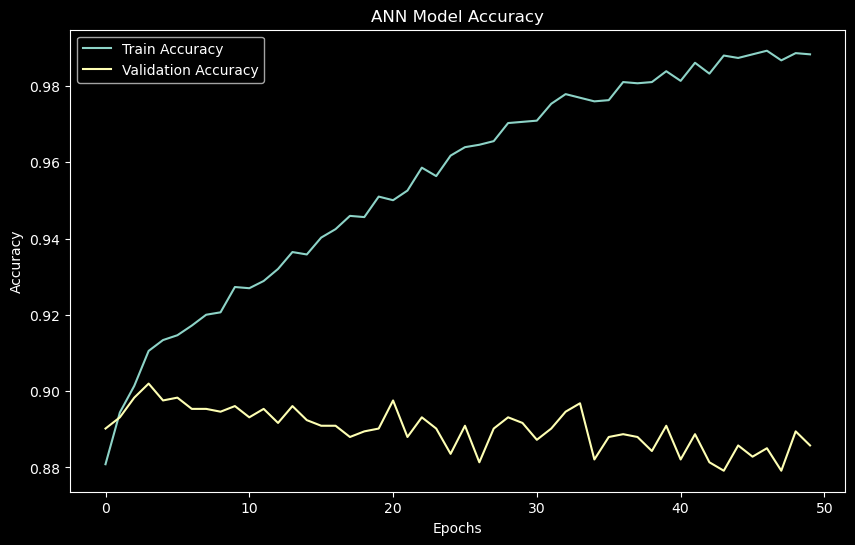

In [25]:
# Plot accuracy over epochs
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('ANN model Accuracy.png')
plt.show()

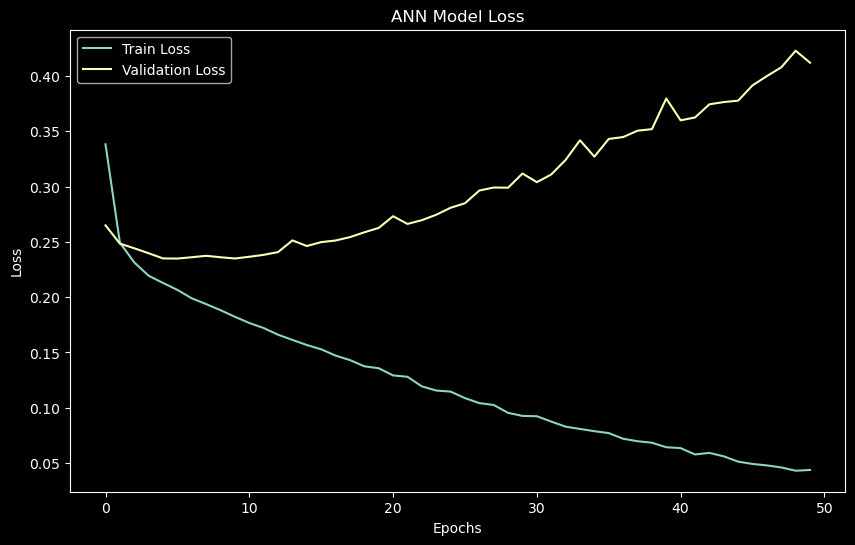

In [26]:
# Plot loss over epochs
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ANN model Loss.png')
plt.show()


# ---- Summary of Results ----

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


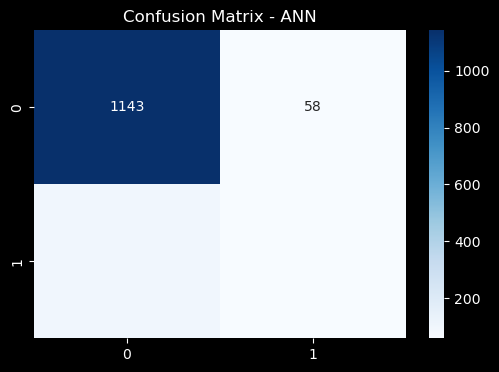

In [28]:
# Confusion Matrix for ANN
y_pred_ann = (ann.predict(X_test) > 0.5).astype(int)
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - ANN")
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


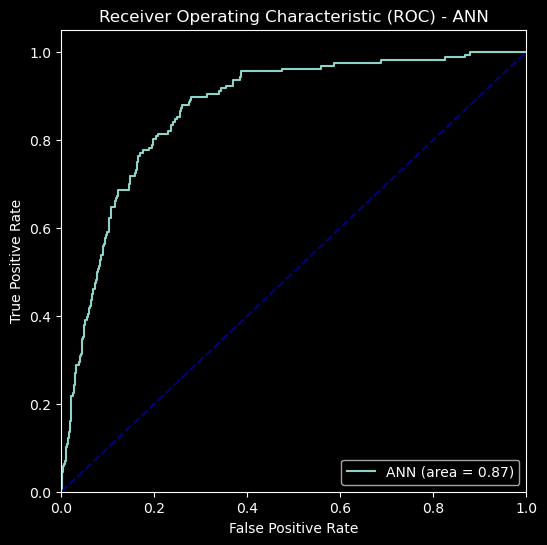

In [29]:
# ROC Curve for ANN
fpr, tpr, thresholds = roc_curve(y_test, ann.predict(X_test))
plt.style.use('dark_background')
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - ANN')
plt.legend(loc="lower right")
plt.show()